22
94117.64705882352


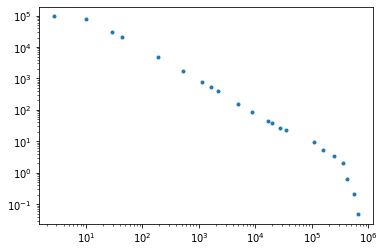

In [2]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

#frequency is in hz
frequency = [34120, 27390, 20010, 16620, 8643, 4952, 2177, 1646, 1137, 514.5, 190, 43.20, 29.25, 10, 2.7,
             106800, 158400, 248700, 349600, 424600, 550900, 662200]#, 806400]#, 1055000]#, 1509000, 2530000, 3007000]

#vout & vin are in voltage
vout = [3.64, 4.36, 6, 7.28, 14.2, 25.2, 6.56, 8.68, 12.6, 28.0, 14.0, 14.8, 21.4, 8.8, 24.0, 11.2, 
        6.2, 3.8, 2.4, 7.9, 8.6, 1.9, 2.1]#, 2.2, 3.0, 3.4, 5.6, 6.7]


vin = [0.160]

vin = [vin[0] for i in range (0,6)]

for i in range(0,4):
    vin.append(0.01587)

vin.append(0.00298)

for i in range(0,2):
    vin.append(0.000722)
    
vin.append(0.000112)
#print(vin)

vin.append(0.000255)

for i in range(0,4):
    vin.append(1.137)
    
vin.append(12.4)
vin.append(39.2)

vin.append(39.2)
#vin.append(39.6)
#vin.append(39.8)

#vin.append(40.2)
#vin.append(41.8)
#vin.append(44.8)
#vin.append(45.4)

#time difference is in microseconds
time_difference = [36.4, 45.6, 62, 74, 142, 250, 564, 744, 1085, 2380, 6460, 29200, 41200, 122500, 454000,
                   11.75, 7.7, 4.9, 3.8, 3.2, 2.59, 2.54]#, 1.690, 1.3]#, 0.895, 0.554, 0.472]
time_difference = [i*10**-6 for i in time_difference]

#phase_shift = [360*frequency[i]*time_difference[i] for i in (0,12)
    
print(len(time_difference))
phase_shift = []

for i in range(0,22):
    num = 360*frequency[i]*time_difference[i]
    phase_shift.append(num)
    
#print(phase_shift)

#phase_shift = [np.deg2rad(i) for i in phase_shift]
#print(phase_shift)

#r_1 1.242 komega, r_2 2.870 komega, r_3 11.88 komega, r_4 30.40 komega, r_5 329.3 komega, r_6 1.012 Momega
#r_7 = 19.3 omega, r_8 7.1 omega, r_9 3.1 omega

#ratio cal between Vout and Vin
#A lambda x,y:x/y

gain = [vout[i]/vin[i] for i in range(0,22)]
#frequency_1 = [frequency[i] for i in range(0,15)]

print(max(gain))

a_max = max(gain)
#plt.plot(frequency, gain, '.')

#plt.yscale('log')
#plt.xscale('log')
#A_ol = Amax/\sqrt(1+(v/v_0)**2)\sqrt(1+(v/v_1)**2)
#plt.ylim(0,800)


new_list = zip(frequency, gain, time_difference)

data = list(new_list)

data.sort(key=lambda y: y[1], reverse=True)

x, y, z = zip(*data)

#print("frequency =", x)
#print("gain =", y)
#print("time_difference =", z)

data = [x, y, z]

plt.plot(data[0], data[1], '.')

plt.yscale('log')
plt.xscale('log')

In [3]:
#a_m = 99635.3478444983
#v_0 = 10.54980731844167
A_ol = lambda v, v_0, a_m: a_m/((np.sqrt(1+(v/v_0)**2)))#*np.sqrt(1+(v/v_1)**2))

start = 0
x = [data[0][i] for i in range(start, 22)]
y = [data[1][i] for i in range(start, 22)]
params, extras = curve_fit(A_ol, x, y, p0 = [10, 10000], maxfev=6000)#, bounds = [(-np.inf, 10**5),(np.inf, np.inf)])#, p0 = [3.7*10**5])#, bounds = [(10**5),(5*10**5)])

print(f"v_0: {params[0]}, a_m: {params[1]}")#, a_m: {params#[2]}")
    #print(f"v_1:", params[0])


v_0: 10.54980723382252, a_m: 99635.34804863429


v_0: 302374.5626106303, v_1: 9.144786728725247


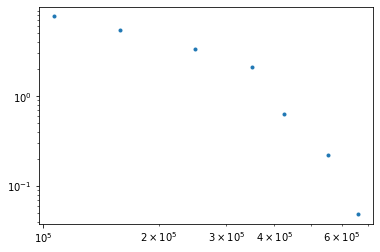

In [148]:
from scipy.optimize import curve_fit

#phase_shift = [i-360 for i in phase_shift]

f = lambda v, v_0: np.arctan(v/v_0)
'''
params, extras = curve_fit(f, frequency, phase_shift)#, bounds= [(3*10**5), (4*10**5)])
print("v_0:", params[0])

A_ol = lambda v, v_0, a_m: a_m/(np.sqrt(1+(v/v_0)**2)#*np.sqrt(1+(v/v_1)**2))

params, extras = curve_fit(A_ol, frequency, gain, p0 = [10, 3.7*10**5, 9.9*10**4],#, bounds = [(10**5, 9*10**4), (5*10**5, 10**5)]) 
                           bounds=[(0, 3*10**5, -np.inf), (np.inf, 5*10**5, np.inf)])#, 10**5])#, bounds = [[10**2, 10**5], [10**4, 10**6]])

print(f"v_0: {params[0]}, v_1: {params[1]}, a_m: {params[2]}")
'''                            
#print(f"v_0: {params[0]}, a_m: {params[1]}")

a_m = 99635.3478444983
start = 13
frequency_1 = [frequency[i] for i in range(start, 20)]
gain_1 = [gain[i] for i in range(start,20)]
A_1ol = lambda v, v_0, v_1: a_m/((np.sqrt(1+(v/v_0)**2))*np.sqrt(1+(v/v_1)**2))

params, extras = curve_fit(A_1ol, frequency_1, gain_1)#, p0 = [3.7*10**5])#, bounds = [(10**5),(5*10**5)])

#print(f"v_0: {params[0]}")
print(f"v_0: {params[0]}, v_1: {params[1]}")#, a_m: {params[2]}")

plt.plot(frequency_1, gain_1, '.')

plt.xscale('log')
plt.yscale('log')

#a_m: 99635.3478444983
#v_0: 10.54980731844167
#v_1: 302374.5626106303


v_0: 9.752205533749958e-07
v_0: 3.590293666996364e-06
v_0: 2.3351032713411536e-05
v_0: 6.721358734952246e-05
v_0: 1.0573184267910086e-05
v_0: 0.00016641629656569953
v_0: 0.00013030216062177806
v_0: 3.7810998238251193e-05
v_0: 0.0009184135641179107
v_0: 0.002852762962146243
v_0: 0.006041131010197329
v_0: 0.005909665694317505
v_0: 0.011052413217850077
v_0: 0.012755986584732749
v_0: 0.01216366495597316
v_0: 0.03152259234934351
v_0: 0.0734022973678269
v_0: 0.007713548015028342
v_0: 0.007917800142611524
v_0: 0.006117484819198334


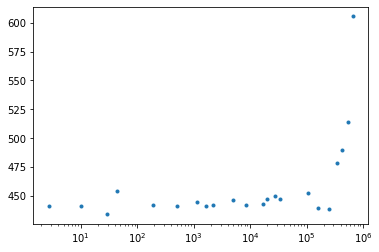

In [15]:
from scipy.optimize import curve_fit

phase_shift = []

for i in range(0,22):
    num = 360*data[0][i]*data[2][i]
    phase_shift.append(num)

f = lambda v, v_0: np.rad2deg(np.arctan(v/v_0))

for j in range(0,20):
    start = j
    x = [data[0][i] for i in range(start, 22)]
    y = [phase_shift[i] for i in range(start, 22)]
    
    params, extras = curve_fit(f, x, y, p0=[3.7*10**5])#, bounds= [(3*10**5), (4*10**5)])
    print("v_0:", params[0])

plt.plot(data[0], phase_shift, '.')
plt.xscale('log')
#phi = tan-1(v/v_0)

v_0: 10930.104607777908, v_1: 367243.6602891563


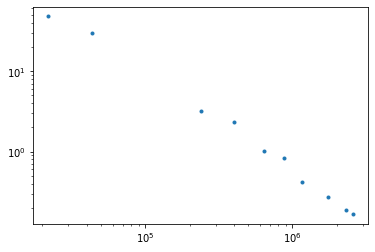

In [224]:
# Closed Loop

r_1 = 326000
r_2 = 102
#r_g = 102
#r_b = 102
#r_a = 10_000

v_read = [18.4, 18.4, 18.4, 18.4, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 19.2]# 18.0,

vin = [i*(r_2/(r_1+r_2)) for i in v_read]

vout = [0.72, 0.72, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.58, 0.28, 0.18, 0.6, 0.440, 0.540, 0.440, 1.12, 0.740,
        0.980, 0.840]

frequency = [0.55, 2, 11.9, 35.18, 95, 265, 430, 2415, 4305, 21_890, 43360, 240000, 400000, 640000, 870000,
            1156000, 1746000, 2314000, 2564000]

r_1_1 = 10_000

r_1_2 = 3_500

r_1_3 = 600

r_1_4 = 240

v_read_1 = [18.8, 18.8]

v_read_2 = [18.8, 18.8]

v_read_3 = [18.4, 18.4]

v_read_4 = [17.2, 16.8]

resistors = [r_1_1, r_1_2, r_1_3, r_1_4]

v_reads = [v_read_1, v_read_2, v_read_3, v_read_4]

for i in range(0, 4):
    for j in range(0,2):
        num = v_reads[i][j]*(r_2/(resistors[i]+r_2))
        vin.append(num)


#time_difference is in microseconds:
time_difference = [1870000, 515000, 85000, 28800, 10600, 3800, 2390, 426, 250, 55.2, 27.6, 4.32, 3.2, 
                  1.94, 1.52, 1.18, 0.820, 0.636, 0.6]

gain = [vout[i]/vin[i] for i in range(0, len(vout))]

a_max = 110.93560632026212
A_ol = lambda v, v_0, v_1: a_max/((np.sqrt(1+(v/v_0)**2)*np.sqrt(1+(v/v_1)**2)))

start = 9
frequency_1 = [frequency[i] for i in range(start, 19)]
gain_1 = [gain[i] for i in range(start, 19)]
params, extras = curve_fit(A_ol, frequency_1, gain_1, p0 = [10**4, 10**5])

print(f"v_0: {params[0]}, v_1: {params[1]}")

plt.plot(frequency_1, gain_1, '.')
plt.xscale('log')
plt.yscale('log')

slope: -92.04051999793478


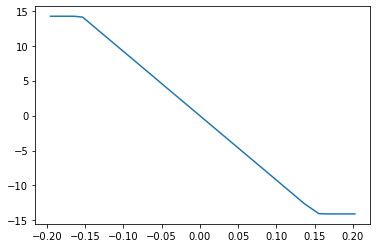

In [8]:
r_1 = 18_000
r_2 = 102
#r_g = 102
#r_b = 102
#r_a = 10_000

vin_read = [-34.67, -29.21, -27.22, -26.91, -25.11, -23.92, -21.51, -18.22, -17.08, -13.09, -9.78, -5.92,
            5.92, 7.45, 8.67, 12.9, 16.24, 18.99, 24.28, 27.58, 29.58, 35.95]

vout = [14.21, 14.21, 14.08, 13.92, 12.99, 12.37, 11.12, 9.42, 8.83, 6.76, 5.041, 3.033, 
       -3.103, -3.897, -4.528, -6.72, -8.45, -9.88, -12.63, -14.03, -14.07, -14.07]

vin = [i*(r_2/(r_1+r_2)) for i in vin_read]

plt.plot(vin, vout)

vin_calc = [vin[i] for i in range(4, len(vin)-3)]
vout_calc = [vout[i] for i in range(4, len(vout)-3)]
m, b = np.polyfit(vin_calc, vout_calc, 1)

print('slope:', m)